## Agenda : Analyzing the Purchasing Behavior of Customers in Walmart Dataset and Recommendations For Black Friday.

### 1. Loading Dataset and Inspecting Data types

In [37]:
import pandas as pd, seaborn as sns, scipy.stats as st, matplotlib.pyplot as plt, numpy as np

In [2]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


### 2. Non-Visual Analysis- Value Counts

In [10]:
for i in df.columns:
    print(i, df[i].nunique())

User_ID 5891
Product_ID 3631
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category 20
Purchase 18105


In [15]:
df.groupby('Gender').agg(number_of_customers = ('User_ID', 'count'))

,number_of_customers
Gender,
F,135809
M,414259


In [16]:
df.groupby('Marital_Status').agg(number_of_customers = ('User_ID', 'count'))

,number_of_customers
Marital_Status,
0,324731
1,225337


In [17]:
df.groupby('City_Category').agg(number_of_customers = ('User_ID', 'count'))

,number_of_customers
City_Category,
A,147720
B,231173
C,171175


In [84]:
df.Purchase.describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

### 3. Visual Analysis - Univariate, Bivariate & Multivariate

#### Univariate Analysis of all variables

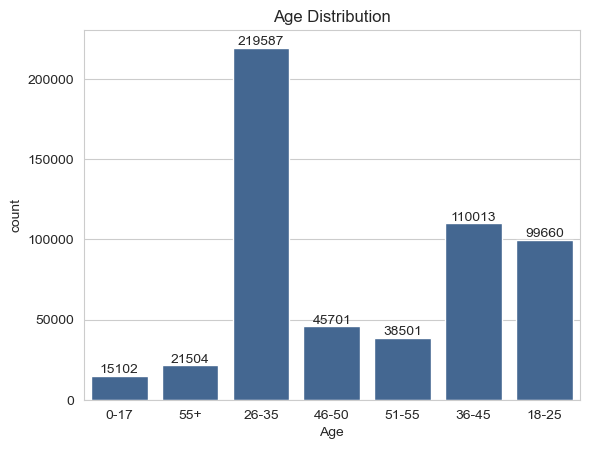

In [4]:
sns.set_style('whitegrid')
sns.set_palette("mako")
mako_colors = sns.color_palette("mako")
cp =sns.countplot(x = 'Age', data = df, color = mako_colors[2]);
for i in cp.containers:
    cp.bar_label(i)
plt.title('Age Distribution');

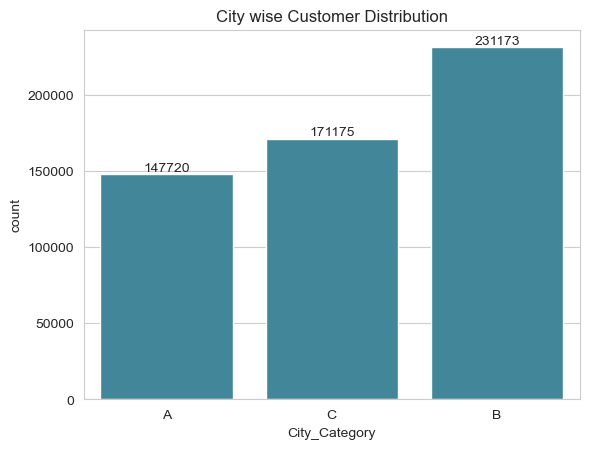

In [62]:
cp =sns.countplot(x = 'City_Category', data = df, color = mako_colors[3]);
for i in cp.containers:
    cp.bar_label(i)
plt.title('City wise Customer Distribution');

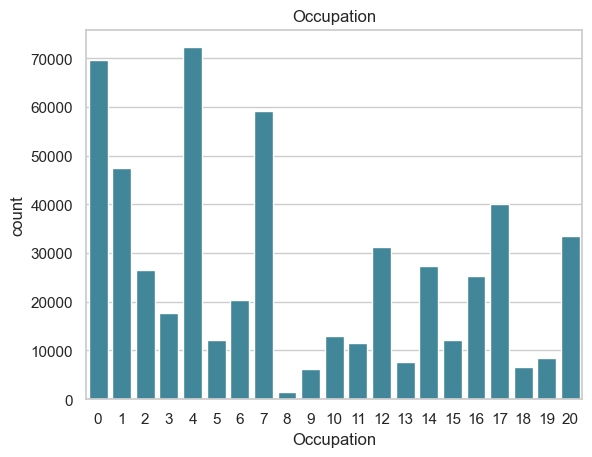

In [83]:
sns.countplot(x = 'Occupation', data = df, color = mako_colors[3]);
plt.title('Occupation');

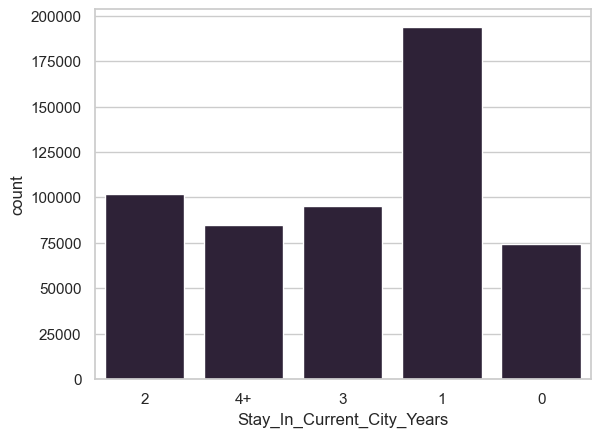

In [71]:
sns.countplot(x = 'Stay_In_Current_City_Years', data = df, color = mako_colors[0]);

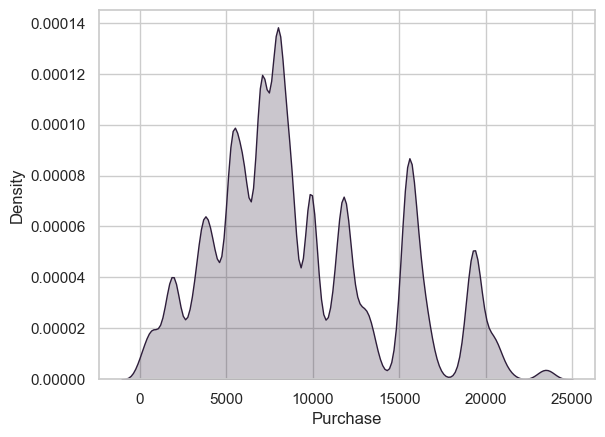

In [92]:
sns.kdeplot(x= 'Purchase', data = df, fill = True);

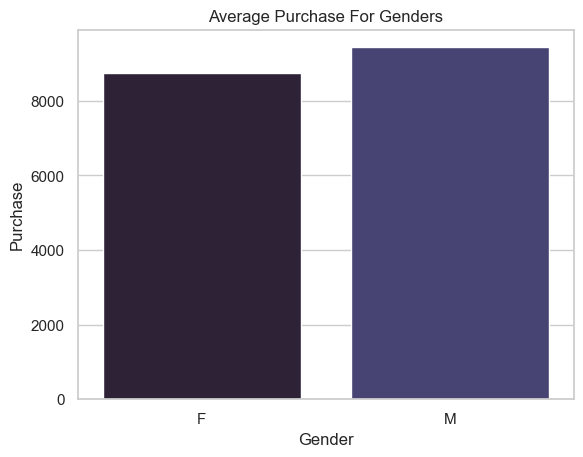

In [94]:
sns.barplot(x= 'Gender', y = 'Purchase', data = df, ci = None);
plt.title('Average Purchase For Genders');

#### Bivariate Visual Analysis w.r.t Purchase

In [46]:
categorical_columns = [i  for i in df.columns if (df[i].nunique() < 30)]
categorical_columns

['Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category']

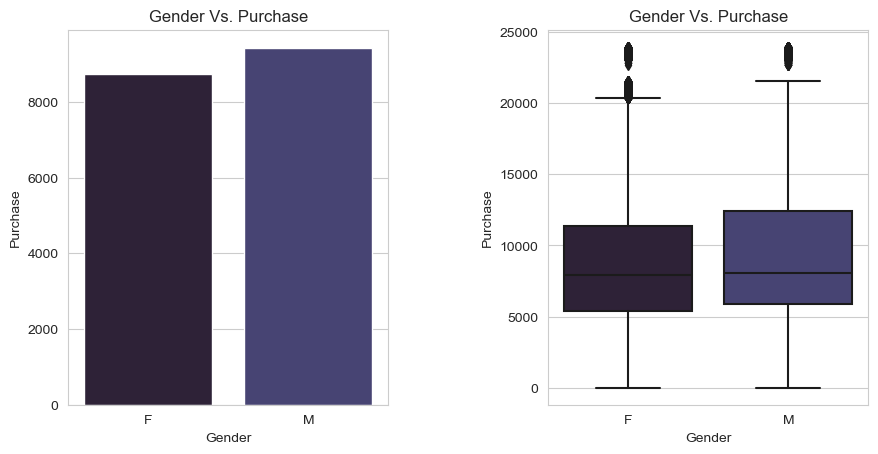

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(4, 1.5))
plt.subplots_adjust(left=3,
                    bottom=2, 
                    right=5, 
                    top=4.5, 
                    wspace=0.5, 
                    hspace=0.5)
bar = sns.barplot(x= categorical_columns[0], y = 'Purchase', data = df, ci = None, ax = axes[0]);
box = sns.boxplot(x= categorical_columns[0], y = 'Purchase', data = df, ax = axes[1]);
axes[0].set_title(f'{categorical_columns[0]} Vs. Purchase');
axes[1].set_title(f'{categorical_columns[0]} Vs. Purchase');

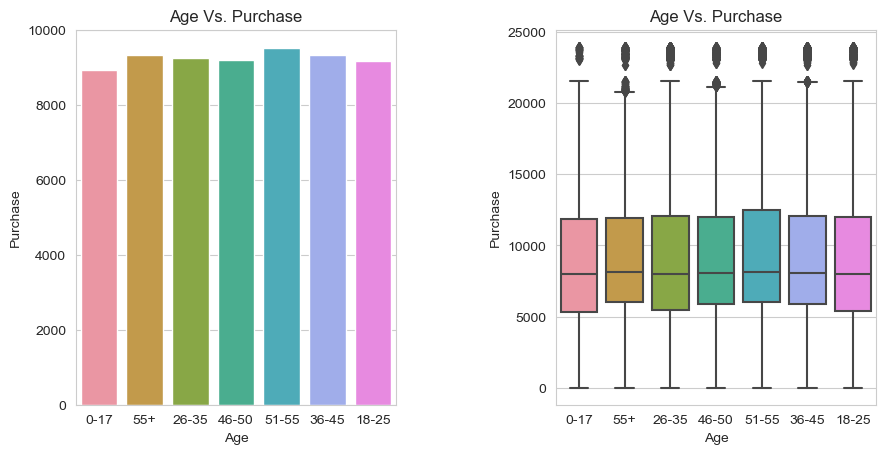

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(4, 1.5))
plt.subplots_adjust(left=3,
                    bottom=2, 
                    right=5, 
                    top=4.5, 
                    wspace=0.5, 
                    hspace=0.5)
bar = sns.barplot(x= categorical_columns[1], y = 'Purchase', data = df, ci = None, ax = axes[0]);
box = sns.boxplot(x= categorical_columns[1], y = 'Purchase', data = df, ax = axes[1]);
axes[0].set_title(f'{categorical_columns[1]} Vs. Purchase');
axes[1].set_title(f'{categorical_columns[1]} Vs. Purchase');

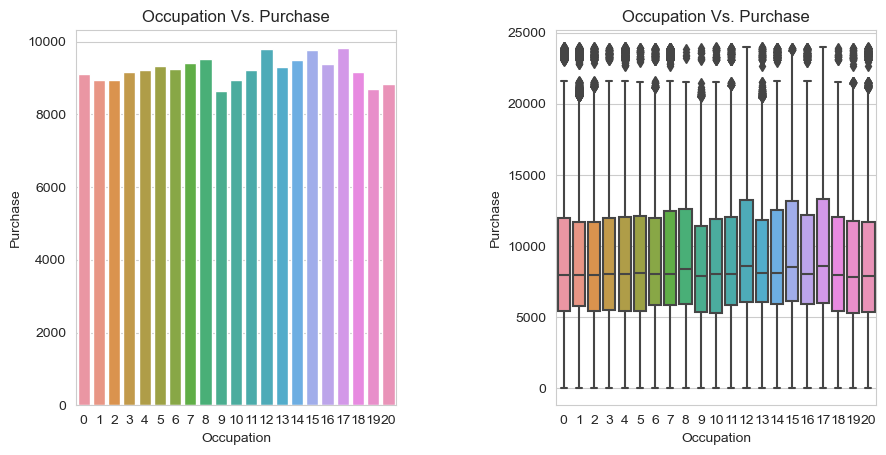

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(4, 1.5))
plt.subplots_adjust(left=3,
                    bottom=2, 
                    right=5, 
                    top=4.5, 
                    wspace=0.5, 
                    hspace=0.5)
bar = sns.barplot(x= categorical_columns[2], y = 'Purchase', data = df, ci = None, ax = axes[0]);
box = sns.boxplot(x= categorical_columns[2], y = 'Purchase', data = df, ax = axes[1]);
axes[0].set_title(f'{categorical_columns[2]} Vs. Purchase');
axes[1].set_title(f'{categorical_columns[2]} Vs. Purchase');

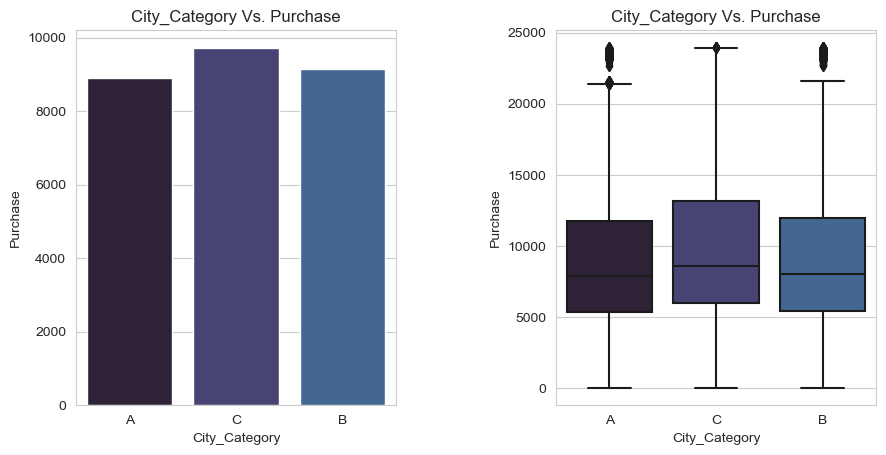

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(4, 1.5))
plt.subplots_adjust(left=3,
                    bottom=2, 
                    right=5, 
                    top=4.5, 
                    wspace=0.5, 
                    hspace=0.5)
bar = sns.barplot(x= categorical_columns[3], y = 'Purchase', data = df, ci = None, ax = axes[0]);
box = sns.boxplot(x= categorical_columns[3], y = 'Purchase', data = df, ax = axes[1]);
axes[0].set_title(f'{categorical_columns[3]} Vs. Purchase');
axes[1].set_title(f'{categorical_columns[3]} Vs. Purchase');

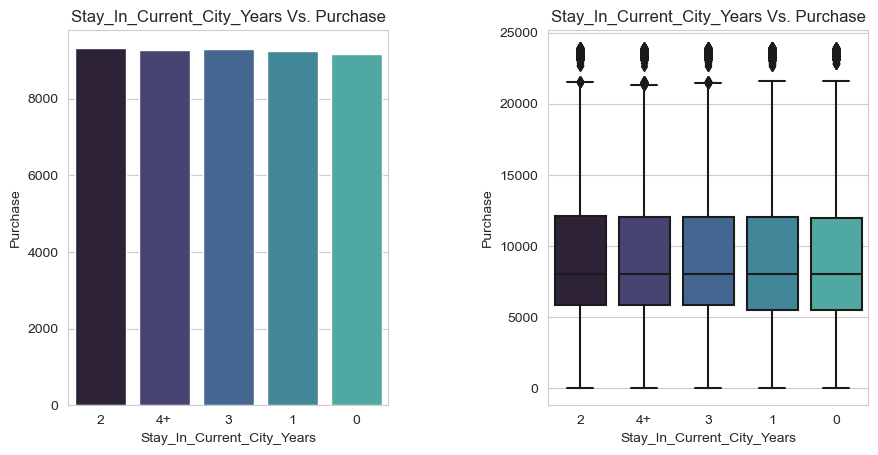

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(4, 1.5))
plt.subplots_adjust(left=3,
                    bottom=2, 
                    right=5, 
                    top=4.5, 
                    wspace=0.5, 
                    hspace=0.5)
bar = sns.barplot(x= categorical_columns[4], y = 'Purchase', data = df, ci = None, ax = axes[0]);
box = sns.boxplot(x= categorical_columns[4], y = 'Purchase', data = df, ax = axes[1]);
axes[0].set_title(f'{categorical_columns[4]} Vs. Purchase');
axes[1].set_title(f'{categorical_columns[4]} Vs. Purchase');

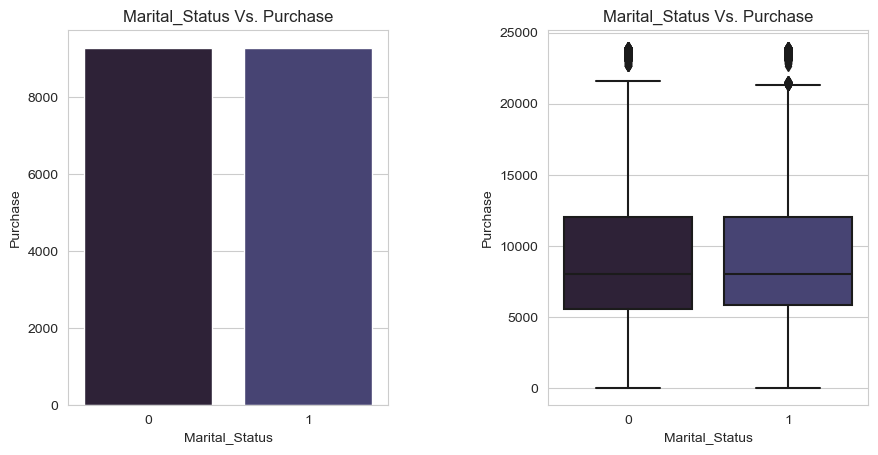

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(4, 1.5))
plt.subplots_adjust(left=3,
                    bottom=2, 
                    right=5, 
                    top=4.5, 
                    wspace=0.5, 
                    hspace=0.5)
bar = sns.barplot(x= categorical_columns[5], y = 'Purchase', data = df, ci = None, ax = axes[0]);
box = sns.boxplot(x= categorical_columns[5], y = 'Purchase', data = df, ax = axes[1]);
axes[0].set_title(f'{categorical_columns[5]} Vs. Purchase');
axes[1].set_title(f'{categorical_columns[5]} Vs. Purchase');

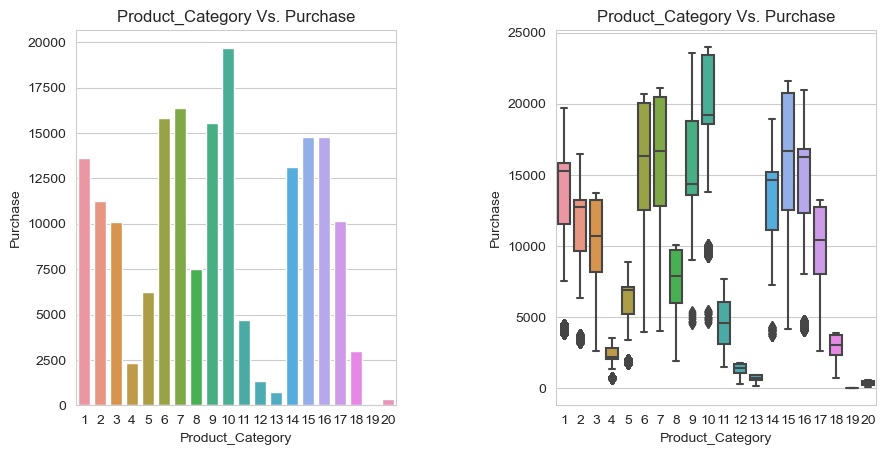

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(4, 1.5))
plt.subplots_adjust(left=3,
                    bottom=2, 
                    right=5, 
                    top=4.5, 
                    wspace=0.5, 
                    hspace=0.5)
bar = sns.barplot(x= categorical_columns[6], y = 'Purchase', data = df, ci = None, ax = axes[0]);
box = sns.boxplot(x= categorical_columns[6], y = 'Purchase', data = df, ax = axes[1]);
axes[0].set_title(f'{categorical_columns[6]} Vs. Purchase');
axes[1].set_title(f'{categorical_columns[6]} Vs. Purchase');

#### Observations:

So far in our visual analysis, we have seen that Male customers average purchase is slighty above the Female customers. Age Group 26-35 is the most frequent. Occupation 4 is the most frequent in data.  Most customers have been staying in their current city for just 1 year or less. Most Customers belong to City Category B.

In our Bivariate Analysis, it can be seen that the purchases are almost uniformly distributed and have the same spread across all sections, for all variables except for Product Category.

Let's now try to find the confidence intervals for purchases across variables. We'll use Central Limit Theorem to infer the Mean Purchase Amount for Both Females and Males first.

In [15]:
male_df, female_df = df[df.Gender == 'M'], df[df.Gender == 'F']
male_sample_means= pd.Series([male_df.sample(100)['Purchase'].mean() for i in range(10000)]
female_sample_means = [female_df.sample(100)['Purchase'].mean() for i in range(10000)]

In [49]:
males = round(pd.Series(male_sample_means).mean(), 2)
females = round(pd.Series(female_sample_means).mean(), 2)
males_std_error = round(pd.Series(male_sample_means).std()/np.sqrt(100), 2)
females_std_error = round(pd.Series(female_sample_means).std()/np.sqrt(100), 2)

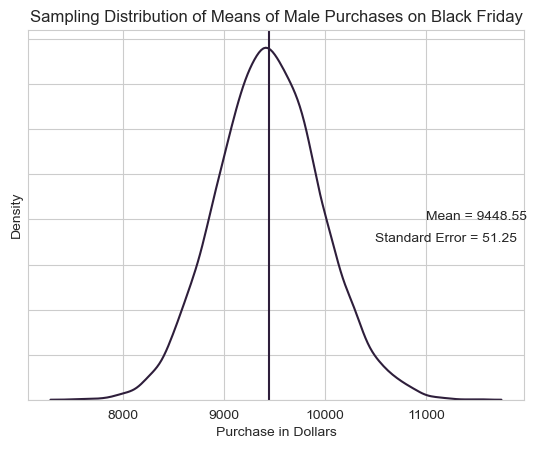

In [52]:
sns.kdeplot(male_sample_means);
plt.axvline(males);
plt.annotate(f'Mean = {males}', xy = (males, 0), xytext = (11000, 0.0004))
plt.annotate(f'Standard Error = {males_std_error}', xy = (males, 0), xytext = (10500, 0.00035))
plt.xlabel('Purchase in Dollars');
plt.tick_params(labelleft = False);
plt.title('Sampling Distribution of Means of Male Purchases on Black Friday');

In [45]:
print('Male Purchase Interval with 95% Confidence = ', st.norm.interval(confidence = 0.95, loc = males, scale= males_std_error))

Male Purchase Interval with 95% Confidence =  (9348.101845792322, 9548.998154207677)


In [46]:
print('Male Purchase Interval with 90% Confidence = ', st.norm.interval(confidence = 0.90, loc = males, scale= males_std_error))

Male Purchase Interval with 90% Confidence =  (9364.251251618736, 9532.848748381262)


In [47]:
print('Male Purchase Interval with 99% Confidence = ', st.norm.interval(confidence = 0.99, loc = males, scale= males_std_error))

Male Purchase Interval with 99% Confidence =  (9316.538748193117, 9580.561251806881)


In [48]:
print('Male Purchase Interval with 68% Confidence = ', st.norm.interval(confidence = 0.68, loc = males, scale= males_std_error))

Male Purchase Interval with 68% Confidence =  (9397.5840334855, 9499.515966514498)


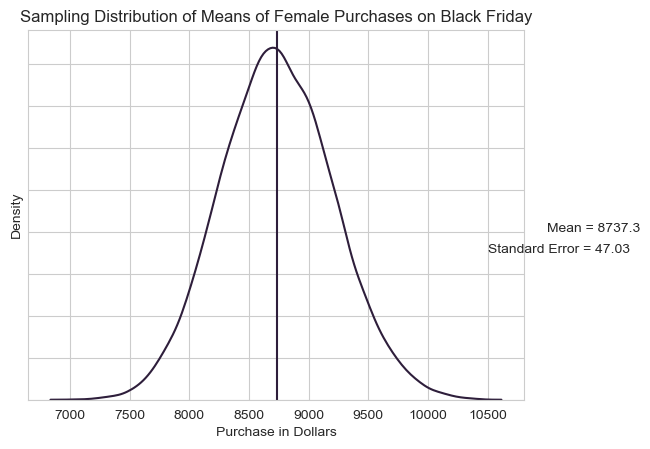

In [53]:
sns.kdeplot(female_sample_means);
plt.axvline(females);
plt.annotate(f'Mean = {females}', xy = (males, 0), xytext = (11000, 0.0004))
plt.annotate(f'Standard Error = {females_std_error}', xy = (females, 0), xytext = (10500, 0.00035))
plt.xlabel('Purchase in Dollars');
plt.tick_params(labelleft = False);
plt.title('Sampling Distribution of Means of Female Purchases on Black Friday');

In [54]:
print('Female Purchase Interval with 95% Confidence = ', st.norm.interval(confidence = 0.95, loc = females, scale= females_std_error))

Female Purchase Interval with 95% Confidence =  (8645.12289380708, 8829.477106192919)


In [55]:
print('Female Purchase Interval with 90% Confidence = ', st.norm.interval(confidence = 0.90, loc = females, scale= females_std_error))

Female Purchase Interval with 90% Confidence =  (8659.942533924472, 8814.657466075527)


In [56]:
print('Female Purchase Interval with 99% Confidence = ', st.norm.interval(confidence = 0.99, loc = females, scale= females_std_error))

Female Purchase Interval with 99% Confidence =  (8616.158747854095, 8858.441252145903)


In [57]:
print('Female Purchase Interval with 68% Confidence = ', st.norm.interval(confidence = 0.68, loc = females, scale= females_std_error))

Female Purchase Interval with 68% Confidence =  (8690.530645752644, 8784.069354247355)


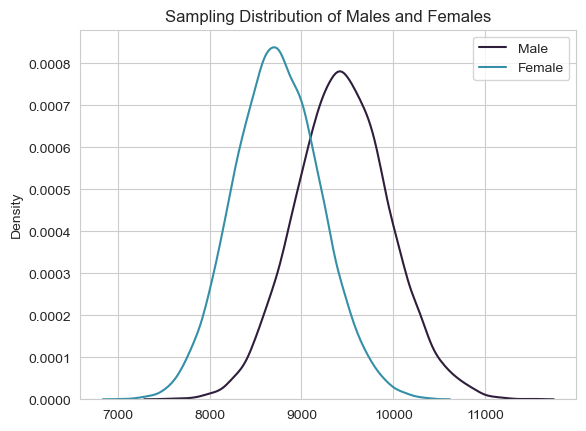

In [61]:
sns.kdeplot(male_sample_means, color = mako_colors[0], label = 'Male');
sns.kdeplot(female_sample_means, color = mako_colors[3], label = 'Female');
plt.title('Sampling Distribution of Males and Females');
plt.legend();

The above shows some overlap in both Males and Females Sampling Distributions. So, we cannot claim that Males spends more than Females on Black Friday. Let's use the T-test to answer this question.

In [62]:
from scipy.stats import ttest_ind

In [64]:
# H0: Males and Females Spends Same on Average
# Ha: Males Spends More than Females on Average
alpha = 0.05
t_stat, pvalue = ttest_ind(male_sample_means, female_sample_means, alternative = 'greater')
print(pvalue)
if alpha < pvalue:
    print('Fail to reject the Null Hypothesis')
    print('There is no difference in Spending')
else:
    print('Reject Null Hypothesis')
    print('Males spend more than Females on Average on Black Friday')

0.0
Reject Null Hypothesis
Males spend more than Females on Average on Black Friday


Lets now do the same for Married and Unmarried Customers. 

In [72]:
married,unmarried = df[df.Marital_Status == 1], df[df.Marital_Status != 1]

In [82]:
married_sample_means = np.array([married.sample(100)['Purchase'].mean() for i in range(10000)])
unmarried_sample_means = np.array([unmarried.sample(100)['Purchase'].mean() for i in range(10000)])

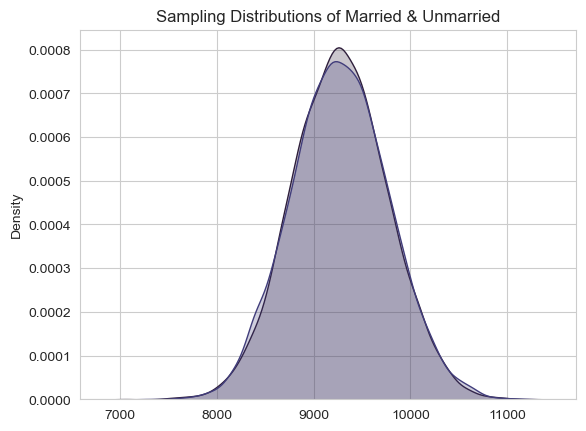

In [90]:
sns.kdeplot(x= married_sample_means, color = mako_colors[0], fill = True);
sns.kdeplot(x= unmarried_sample_means, color = mako_colors[1], fill = True);
plt.title('Sampling Distributions of Married & Unmarried');

The above confirms the above observation we made above but lets go ahead with the T-test.

In [93]:
# H0: Married & Unmarried spend same on Average
# Ha: Married & Unmarried don't spend same on Average
alpha = 0.05
t_stat, pval= ttest_ind(married_sample_means, unmarried_sample_means, alternative = 'two-sided')
print(pval)
if alpha < pval:
    print('Fail to reject the Null Hypothesis')
    print('There is no difference in Spending')
else:
    print('Reject Null Hypothesis')
    print('There is a Difference in Spending')

0.7636089502390304
Fail to reject the Null Hypothesis
There is no difference in Spending


By the above deduction, we can use the same Confidence Interval for both Groups.

In [97]:
married_sample_means.mean(), unmarried_sample_means.mean(), married_sample_means.std()/np.sqrt(100), unmarried_sample_means.std()/np.sqrt(100)

(9267.165434999999, 9269.285624, 49.412243891055056, 50.27674503863895)

In [98]:
print('95% Confidence Interval = ', st.norm.interval(0.95, loc = married_sample_means.mean(), scale = married_sample_means.std())

(8298.703250782226, 10235.627619217772)

In [101]:
print('90% Confidence Interval = ', st.norm.interval(0.90, loc = married_sample_means.mean(), scale = married_sample_means.std()))

90% Confidence Interval =  (8454.406349199873, 10079.924520800125)


In [102]:
print('99% Confidence Interval = ', st.norm.interval(0.99, loc = married_sample_means.mean(), scale = married_sample_means.std()))

99% Confidence Interval =  (7994.3903773131515, 10539.940492686846)


Lets now focus towards the Age Groups.

In [107]:
values = df.Age.unique()

In [135]:
age_groups = []
for i in range(len(df.Age.unique())):
    age_groups.append(df[df.Age ==  values[i]])
    

We can do ANOVA Test to find out whether or not Purchase Amount depends on the Age Group or not.

Let's first check whether the Data is normally distributed or not. We'll do the Shapiro Test and then use QQ Plot.

In [119]:
# H0: The Data is normal
# Ha: The Data is not normal
alpha = 0.05

stat, pval = st.shapiro(df.Purchase)

if pval <= alpha:
    print('Reject Null Hypothesis, Data is not normal')
else:
    print('Fail to reject Null Hypothesis, Data is normal')

Reject Null Hypothesis, Data is not normal


In [125]:
import statsmodels.api as sm

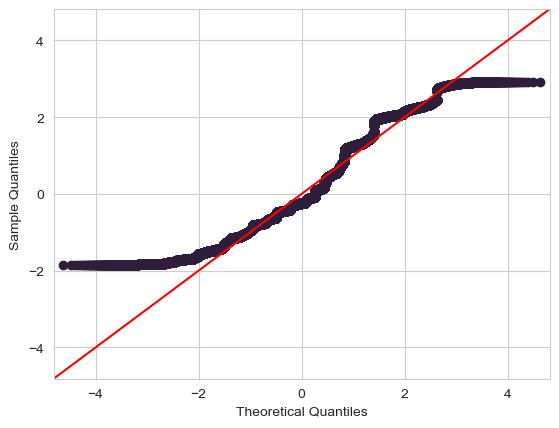

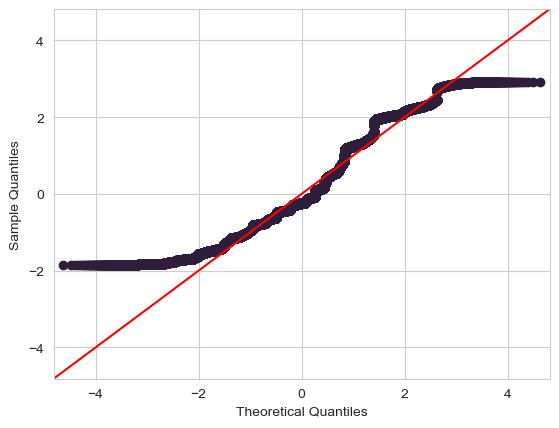

In [128]:
sm.qqplot(df.Purchase, line = '45', fit = True)

We can conclude that the Distribution is not Normal so we cannot do ANOVA. We will do Kruskal to conclude the investigation.

In [132]:
stat, p_val= st.kruskal(*age_groups)
print(p_val)
if p_val < 0.05:
    print("There is a significant difference among the groups.")
else:
    print("There is no significant difference among the groups.")

3.612251655399266e-65
There is a significant difference among the groups.


In [ ]:
We will now interpret the Confidence Interval for each age group.

In [136]:
group_1 = age_groups[0]
group_1.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370


In [137]:
group_1_samples = np.array([group_1.sample(100).Purchase.mean() for i in range(10000)])

In [140]:
group_1_samples.mean(), group_1_samples.std()/np.sqrt(100)

(8932.084495, 50.94649798314944)

In [141]:
print('95 % Confidence Interval for Purchase for Age Group 0-17 = ', st.norm.interval(confidence = 0.95, loc = group_1_samples.mean(), scale = group_1_samples.std()/np.sqrt(100)))

95 % Confidence Interval for Purchase for Age Group 0-17 =  (8832.231193814583, 9031.937796185415)


In [142]:
print('90 % Confidence Interval for Purchase for Age Group 0-17 = ', st.norm.interval(confidence = 0.90, loc = group_1_samples.mean(), scale = group_1_samples.std()/np.sqrt(100)))

90 % Confidence Interval for Purchase for Age Group 0-17 =  (8848.28496301194, 9015.884026988058)


In [143]:
print('99 % Confidence Interval for Purchase for Age Group 0-17 = ', st.norm.interval(confidence = 0.99, loc = group_1_samples.mean(), scale = group_1_samples.std()/np.sqrt(100)))

99 % Confidence Interval for Purchase for Age Group 0-17 =  (8800.855012581807, 9063.313977418191)


In [144]:
group_2 = age_groups[1]
group_2.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [145]:
group_2_samples = np.array([group_2.sample(100).Purchase.mean() for i in range(10000)])

In [147]:
group_2_samples.mean(), group_2_samples.std()/np.sqrt(100)

(9334.630994000001, 50.53147756391178)

In [148]:
print('95 % Confidence Interval for Purchase for Age Group 55+ = ', st.norm.interval(confidence = 0.95, loc = group_2_samples.mean(), scale = group_2_samples.std()/np.sqrt(100)))

95 % Confidence Interval for Purchase for Age Group 55+ =  (9235.59111788914, 9433.670870110862)


In [149]:
print('90 % Confidence Interval for Purchase for Age Group 55+ = ', st.norm.interval(confidence = 0.90, loc = group_2_samples.mean(), scale = group_2_samples.std()/np.sqrt(100)))

90 % Confidence Interval for Purchase for Age Group 55+ =  (9251.514109853784, 9417.747878146218)


In [150]:
print('99 % Confidence Interval for Purchase for Age Group 55+ = ', st.norm.interval(confidence = 0.99, loc = group_2_samples.mean(), scale = group_2_samples.std()/np.sqrt(100)))

99 % Confidence Interval for Purchase for Age Group 55+ =  (9204.470533339254, 9464.791454660748)


In [151]:
group_3 = age_groups[2]
group_3.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227


In [152]:
group_3_samples = np.array([group_3.sample(100).Purchase.mean() for i in range(10000)])

In [153]:
group_3_samples.mean(), group_3_samples.std()/np.sqrt(100)

(9251.067130000001, 50.2989968309551)

In [154]:
print('95 % Confidence Interval for Purchase for Age Group 26-35 = ', st.norm.interval(confidence = 0.95, loc = group_3_samples.mean(), scale = group_3_samples.std()/np.sqrt(100)))

95 % Confidence Interval for Purchase for Age Group 26-35 =  (9152.482907752836, 9349.651352247167)


In [157]:
print('90 % Confidence Interval for Purchase for Age Group 26-35 = ', st.norm.interval(confidence = 0.90, loc = group_3_samples.mean(), scale = group_3_samples.std()/np.sqrt(100)))

90 % Confidence Interval for Purchase for Age Group 26-35 =  (9168.332642630585, 9333.801617369418)


In [156]:
print('99 % Confidence Interval for Purchase for Age Group 26-35 = ', st.norm.interval(confidence = 0.99, loc = group_3_samples.mean(), scale = group_3_samples.std()/np.sqrt(100)))

99 % Confidence Interval for Purchase for Age Group 26-35 =  (9121.505500023713, 9380.628759976289)


In [158]:
group_4 = age_groups[3]
group_4.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215


In [159]:
group_4_samples = np.array([group_4.sample(100).Purchase.mean() for i in range(10000)])

In [160]:
group_4_samples.mean(), group_4_samples.std()/np.sqrt(100)

(9209.594935000001, 49.59929881107753)

In [161]:
print('95 % Confidence Interval for Purchase for Age Group 46-50 = ', st.norm.interval(confidence = 0.95, loc = group_4_samples.mean(), scale = group_4_samples.std()/np.sqrt(100)))

95 % Confidence Interval for Purchase for Age Group 46-50 =  (9112.382095671848, 9306.807774328154)


In [162]:
print('90 % Confidence Interval for Purchase for Age Group 46-50 = ', st.norm.interval(confidence = 0.90, loc = group_4_samples.mean(), scale = group_4_samples.std()/np.sqrt(100)))

90 % Confidence Interval for Purchase for Age Group 46-50 =  (9128.01134845635, 9291.178521543652)


In [163]:
print('99 % Confidence Interval for Purchase for Age Group 46-50 = ', st.norm.interval(confidence = 0.99, loc = group_4_samples.mean(), scale = group_4_samples.std()/np.sqrt(100)))

99 % Confidence Interval for Purchase for Age Group 46-50 =  (9081.83560768695, 9337.354262313052)


In [165]:
group_5 = age_groups[4]
group_5.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378


In [166]:
group_5_samples = np.array([group_5.sample(100).Purchase.mean() for i in range(10000)])

In [167]:
group_5_samples.mean(), group_5_samples.std()/np.sqrt(100)

(9535.443095, 50.60072553881525)

In [168]:
print('95 % Confidence Interval for Purchase for Age Group 51-55 = ', st.norm.interval(confidence = 0.95, loc = group_5_samples.mean(), scale = group_5_samples.std()/np.sqrt(100)))

95 % Confidence Interval for Purchase for Age Group 51-55 =  (9436.267495352327, 9634.618694647674)


In [169]:
print('90 % Confidence Interval for Purchase for Age Group 51-55 = ', st.norm.interval(confidence = 0.90, loc = group_5_samples.mean(), scale = group_5_samples.std()/np.sqrt(100)))

90 % Confidence Interval for Purchase for Age Group 51-55 =  (9452.212308071104, 9618.673881928897)


In [170]:
print('99 % Confidence Interval for Purchase for Age Group 51-55 = ', st.norm.interval(confidence = 0.99, loc = group_5_samples.mean(), scale = group_5_samples.std()/np.sqrt(100)))

99 % Confidence Interval for Purchase for Age Group 51-55 =  (9405.104263376285, 9665.781926623717)


In [171]:
group_6 = age_groups[5]
group_6.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
18,1000007,P00036842,M,36-45,1,B,1,1,1,11788


In [172]:
group_6_samples = np.array([group_6.sample(100).Purchase.mean() for i in range(10000)])

In [173]:
group_6_samples.mean(), group_6_samples.std()/np.sqrt(100)

(9335.616362, 50.03912850090266)

In [174]:
print('95 % Confidence Interval for Purchase for Age Group 36-45 = ', st.norm.interval(confidence = 0.95, loc = group_6_samples.mean(), scale = group_6_samples.std()/np.sqrt(100)))

95 % Confidence Interval for Purchase for Age Group 36-45 =  (9237.54147232046, 9433.691251679542)


In [175]:
print('90 % Confidence Interval for Purchase for Age Group 36-45 = ', st.norm.interval(confidence = 0.90, loc = group_6_samples.mean(), scale = group_6_samples.std()/np.sqrt(100)))

90 % Confidence Interval for Purchase for Age Group 36-45 =  (9253.3093199958, 9417.923404004201)


In [176]:
print('99 % Confidence Interval for Purchase for Age Group 36-45 = ', st.norm.interval(confidence = 0.99, loc = group_6_samples.mean(), scale = group_6_samples.std()/np.sqrt(100)))

99 % Confidence Interval for Purchase for Age Group 36-45 =  (9206.724108483326, 9464.508615516675)


In [177]:
group_7 = age_groups[6]
group_7.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
70,1000018,P00366542,F,18-25,3,B,3,0,5,1780


In [178]:
group_7_samples = np.array([group_7.sample(100).Purchase.mean() for i in range(10000)])

In [179]:
group_7_samples.mean(), group_7_samples.std()/np.sqrt(100)

(9164.541444, 50.861301774554974)

In [180]:
print('95 % Confidence Interval for Purchase for Age Group 18-25 = ', st.norm.interval(confidence = 0.95, loc = group_7_samples.mean(), scale = group_7_samples.std()/np.sqrt(100)))

95 % Confidence Interval for Purchase for Age Group 18-25 =  (9064.855124315049, 9264.227763684952)


In [181]:
print('90 % Confidence Interval for Purchase for Age Group 18-25 = ', st.norm.interval(confidence = 0.90, loc = group_7_samples.mean(), scale = group_7_samples.std()/np.sqrt(100)))

90 % Confidence Interval for Purchase for Age Group 18-25 =  (9080.88204730465, 9248.20084069535)


In [182]:
print('99 % Confidence Interval for Purchase for Age Group 18-25 = ', st.norm.interval(confidence = 0.99, loc = group_7_samples.mean(), scale = group_7_samples.std()/np.sqrt(100)))

99 % Confidence Interval for Purchase for Age Group 18-25 =  (9033.531412472457, 9295.551475527544)


#### Observations

1. We have established that on Black Friday, Males spends more on average than Females. Variance are similar
2. We have seen that Marital Status doesn't have any effect on Average Spending. Variance are similar.
3. We found that Spending is how related to Spending with 51-55 being the group that spends more than any other group and 0-17 spends the least on average. All age groups have almost same variance.


### Recommendations based on the above analysis

1. As Males buys more on Black Friday, Walmart should focus towards Inventory Planning based on the demand of the genders.
2. Focus should be on Diversifying Product catalog to invite all sections of the people
3. We should also offer Gender Based Discounts to attract more customers.
4. Marketing should be done so that Adults specifically Seniors can be attracted.
5. Shopping Experience should be Senior friendly.